# Import libraries

In [36]:
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for visualization
from sklearn import datasets # to load dataset provided sklern
from sklearn.datasets import make_moons # dataset for make_moons
from sklearn.pipeline import Pipeline # to create pipeline to combine preprocessing and training
from sklearn.svm import LinearSVC # linear support vector classifier
from sklearn.svm import LinearSVR # linear support vector regressor
from sklearn.svm import SVC # support vector classifier for different kernel tricks
from sklearn.svm import SVR # support vector regressor for different kernel tricks
from sklearn.preprocessing import StandardScaler # scale the data into standard distribution
from sklearn.preprocessing import PolynomialFeatures # to transform the data into higher dimensional dataset
from sklearn.datasets import fetch_openml # load mnist dataset provided sklearn
from sklearn.datasets import fetch_california_housing # load california housing price dataset
from sklearn.metrics import accuracy_score # to evaluate the score of a model
from sklearn.metrics import mean_squared_error # evaluation metric for regression problems
from sklearn.model_selection import RandomizedSearchCV # to find the best combination of hyperparameters
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from scipy.stats import reciprocal, uniform # to get the best random distribution for hyperparameters

import warnings
warnings.filterwarnings("ignore")

# Linear SVM Classification

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length and petal width
y = (iris["target"] == 2).astype(np.int) # Iris virginica
svm_clf = Pipeline([
                     ("std_scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1])

# Nonlinear SVM Classification

In [4]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
                          ("transform_poly", PolynomialFeatures(degree=3)),
                          ("std_scaler", StandardScaler()),
                          ("svm_clf", LinearSVC(C=9, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('transform_poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=9, loss='hinge'))])

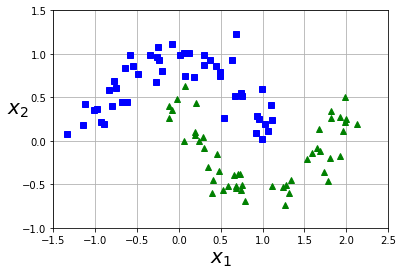

In [5]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

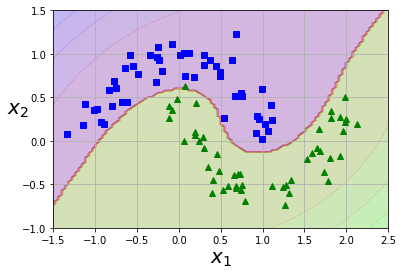

In [6]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# Polynomial Kernel

In [7]:
poly_kernel_svm_clf = Pipeline([
                          ("std_scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [8]:
poly100_kernel_svm_clf = Pipeline([
                          ("std_scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

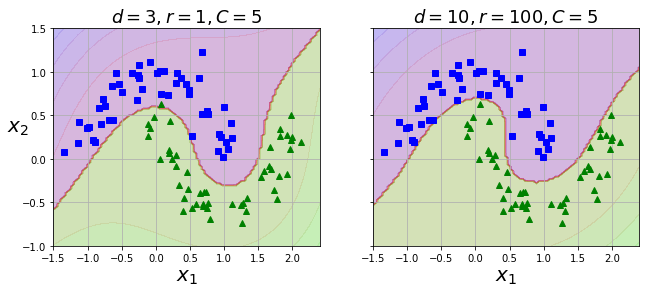

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

# Gaussian RBF Kernel

In [10]:
rbf_kernel_svm_clf = Pipeline([
                        ("scaler", StandardScaler()),
                        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

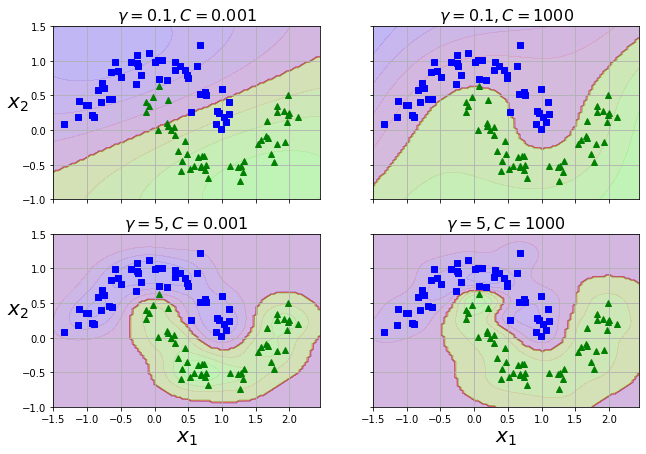

In [11]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# SVM Regression

In [12]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [13]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [14]:
# Non-linear data
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

# Exercises

## No. 9

In [16]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Let's start simple, with a linear SVM classifier. It will automatically use the `One-vs-All` (also called `One-vs-the-Rest`, `OvR`) strategy, so there's nothing special we need to do. Easy!

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [ ]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

Okay, 83.5% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)


92% accuracy on this model.
That's much better (we cut the error rate by about 53%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an SVC with an RBF kernel (the default).


In [20]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [21]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [25]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.972485058923855, gamma=0.003997206819121806; total time=   0.4s
[CV] END ....C=5.972485058923855, gamma=0.003997206819121806; total time=   0.3s
[CV] END ....C=5.972485058923855, gamma=0.003997206819121806; total time=   0.4s
[CV] END ...C=3.848404943774676, gamma=0.0011851515660043107; total time=   0.3s
[CV] END ...C=3.848404943774676, gamma=0.0011851515660043107; total time=   0.3s
[CV] END ...C=3.848404943774676, gamma=0.0011851515660043107; total time=   0.3s
[CV] END ....C=7.095643339798968, gamma=0.010124137770478634; total time=   0.4s
[CV] END ....C=7.095643339798968, gamma=0.010124137770478634; total time=   0.4s
[CV] END ....C=7.095643339798968, gamma=0.010124137770478634; total time=   0.4s
[CV] END ..C=1.5147875124998935, gamma=0.0036082193273637856; total time=   0.4s
[CV] END ..C=1.5147875124998935, gamma=0.0036082193273637856; total time=   0.4s
[CV] END ..C=1.5147875124998935, gamma=0.0036082

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6c3a958d50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6c3a958f10>},
                   verbose=2)

In [26]:
rnd_search_cv.best_estimator_

SVC(C=3.848404943774676, gamma=0.0011851515660043107)

In [27]:
rnd_search_cv.best_score_

0.8619937302572033



This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set:

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

99% accuracy. This looks good! Let's select this model. Now we can test it on the test set:

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)



0.9717

## Question no. 10

In [30]:
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]



Split it into a training set and a test set:



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's train a simple `LinearSVR` first:

In [35]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(random_state=42)

Let's see how it performs on the training set:

In [37]:
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

Let's look at the RMSE:

In [38]:
np.sqrt(mse)

0.9819256687727764



In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [39]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  13.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  11.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  11.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.7s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  16.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  14.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  20.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  16.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  16.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  15.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  21.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6c3a8eea10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6c3a8ee290>},
                   random_state=42, verbose=2)

In [40]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [41]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356



Looks much better than the linear model. Let's select this model and evaluate it on the test set:



In [42]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874